<a href="https://colab.research.google.com/github/Clarke-Kode-it/Oil_Spill-dataset-/blob/main/Theft_detection_YOLOV11_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Train YOLO11 Object Detection on a Custom Dataset**

# **Install Ultralytics**

In [ ]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 28.8 MB/s eta 0:00:00


# **Import all necessary Libraries**

In [ ]:
from ultralytics import YOLO
from IPython.display import Image,display

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## **Download Dataset From Roboflow**

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="y4CLpICV9CZ2Z3RCE805")
project = rf.workspace("theft-h2sei").project("theft-detection-iot5x")
version = project.version(2)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to theft-detection-2 in yolov11:: 100%|██████████| 438/438 [00:00<00:00, 6884.26it/s]


# **Custom Training**

In [17]:
!yolo task=detect mode=train model=yolo11n.pt data=/content/theft-detection-2/data.yaml epochs=30 imgsz=640 plots=True

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/theft-detection-2/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

# **View Training Results**

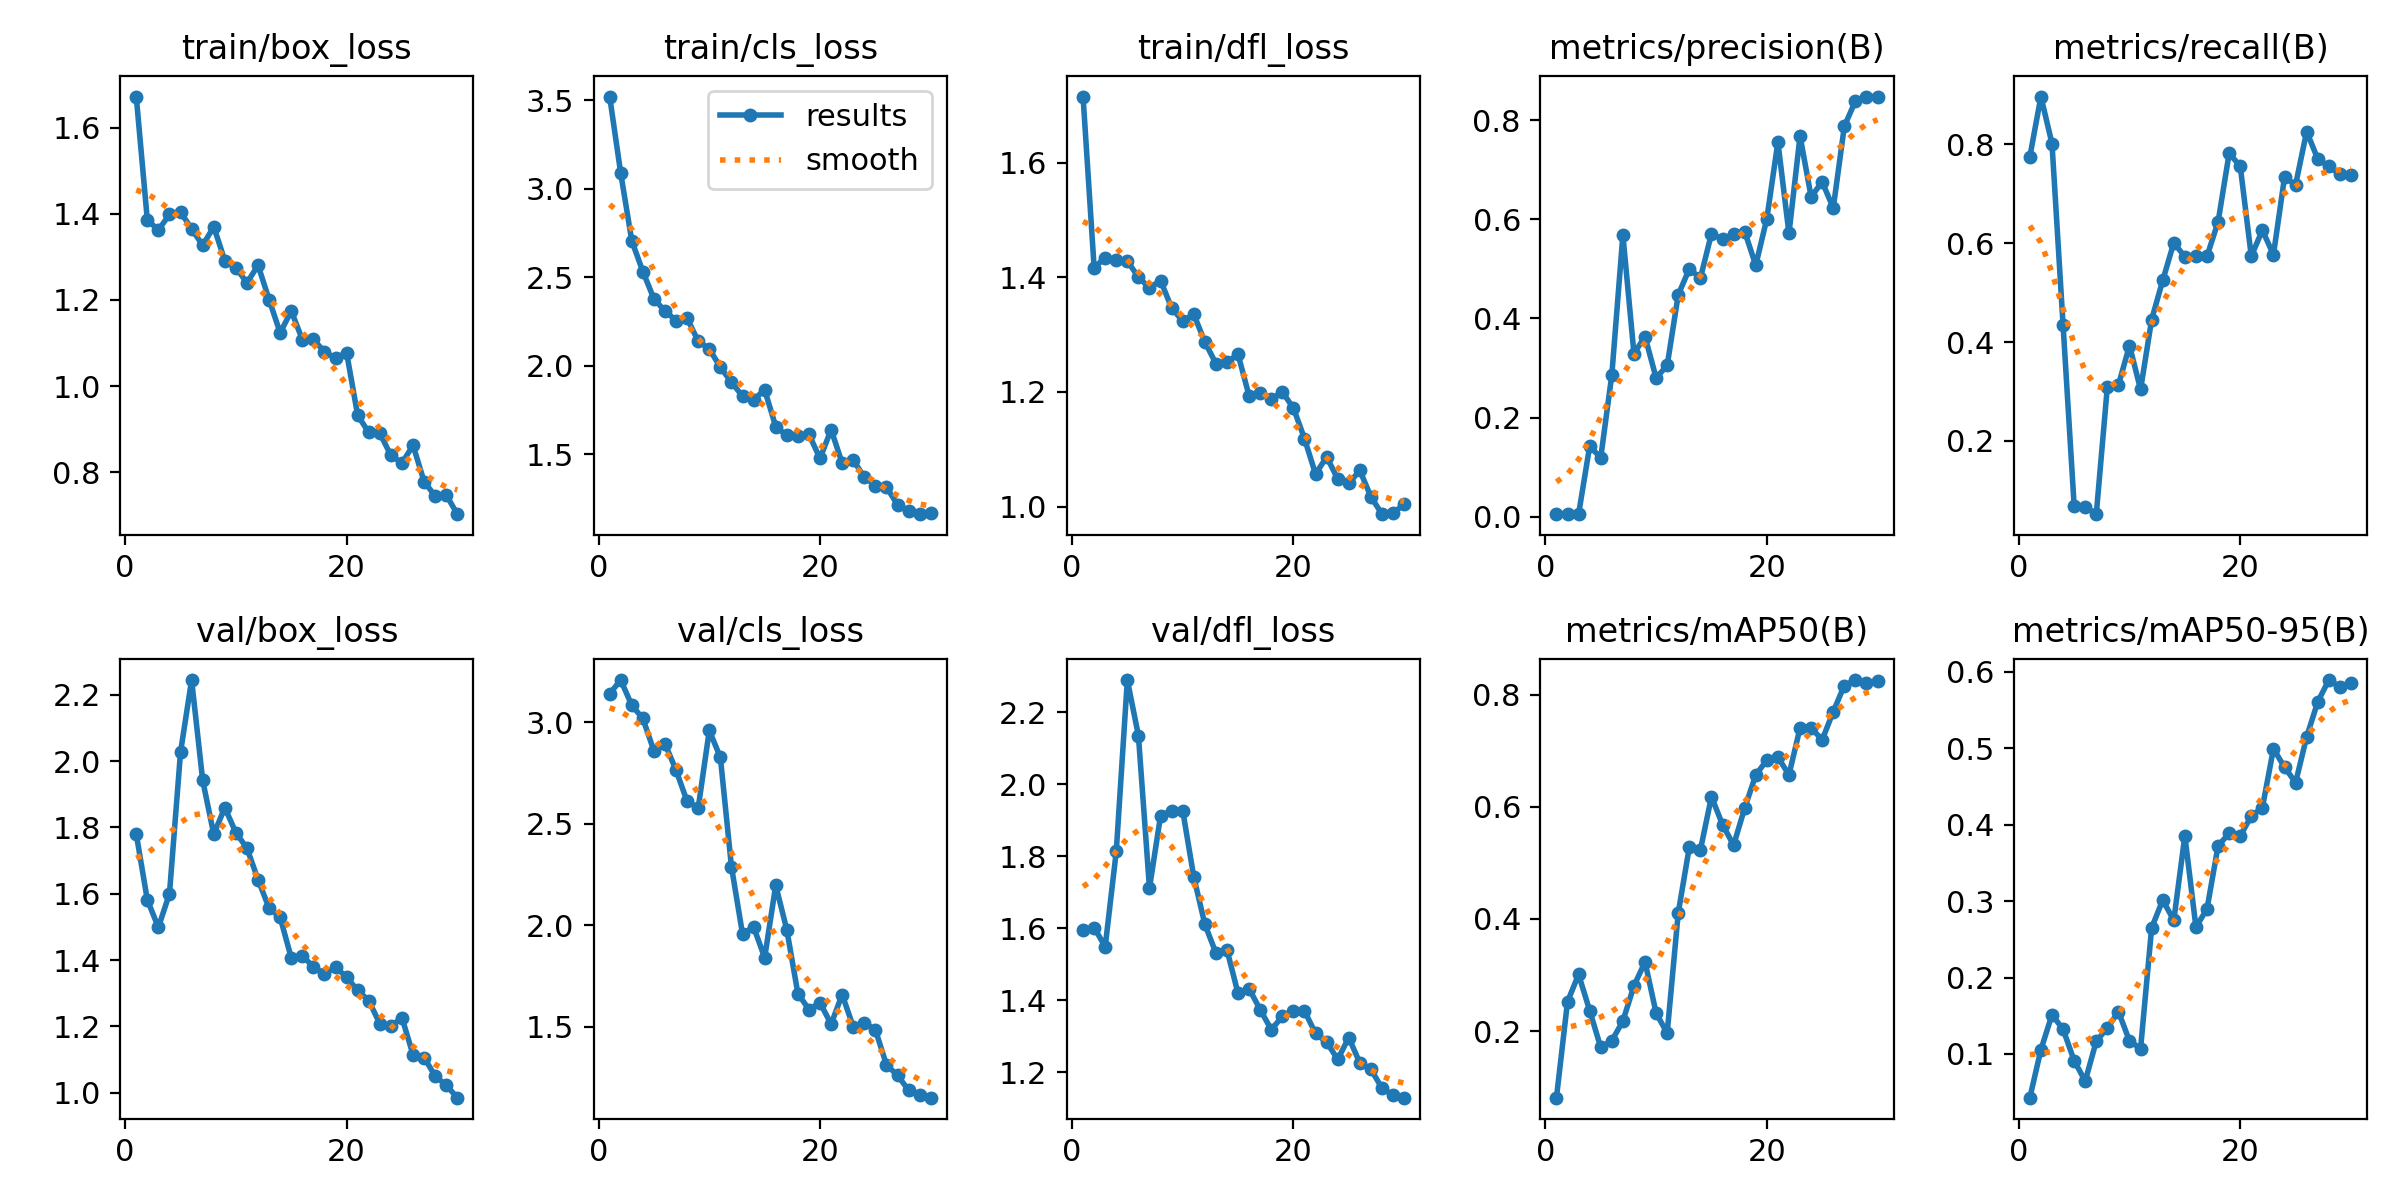

In [18]:
display(Image(filename='/content/runs/detect/train2/results.png', width=600))

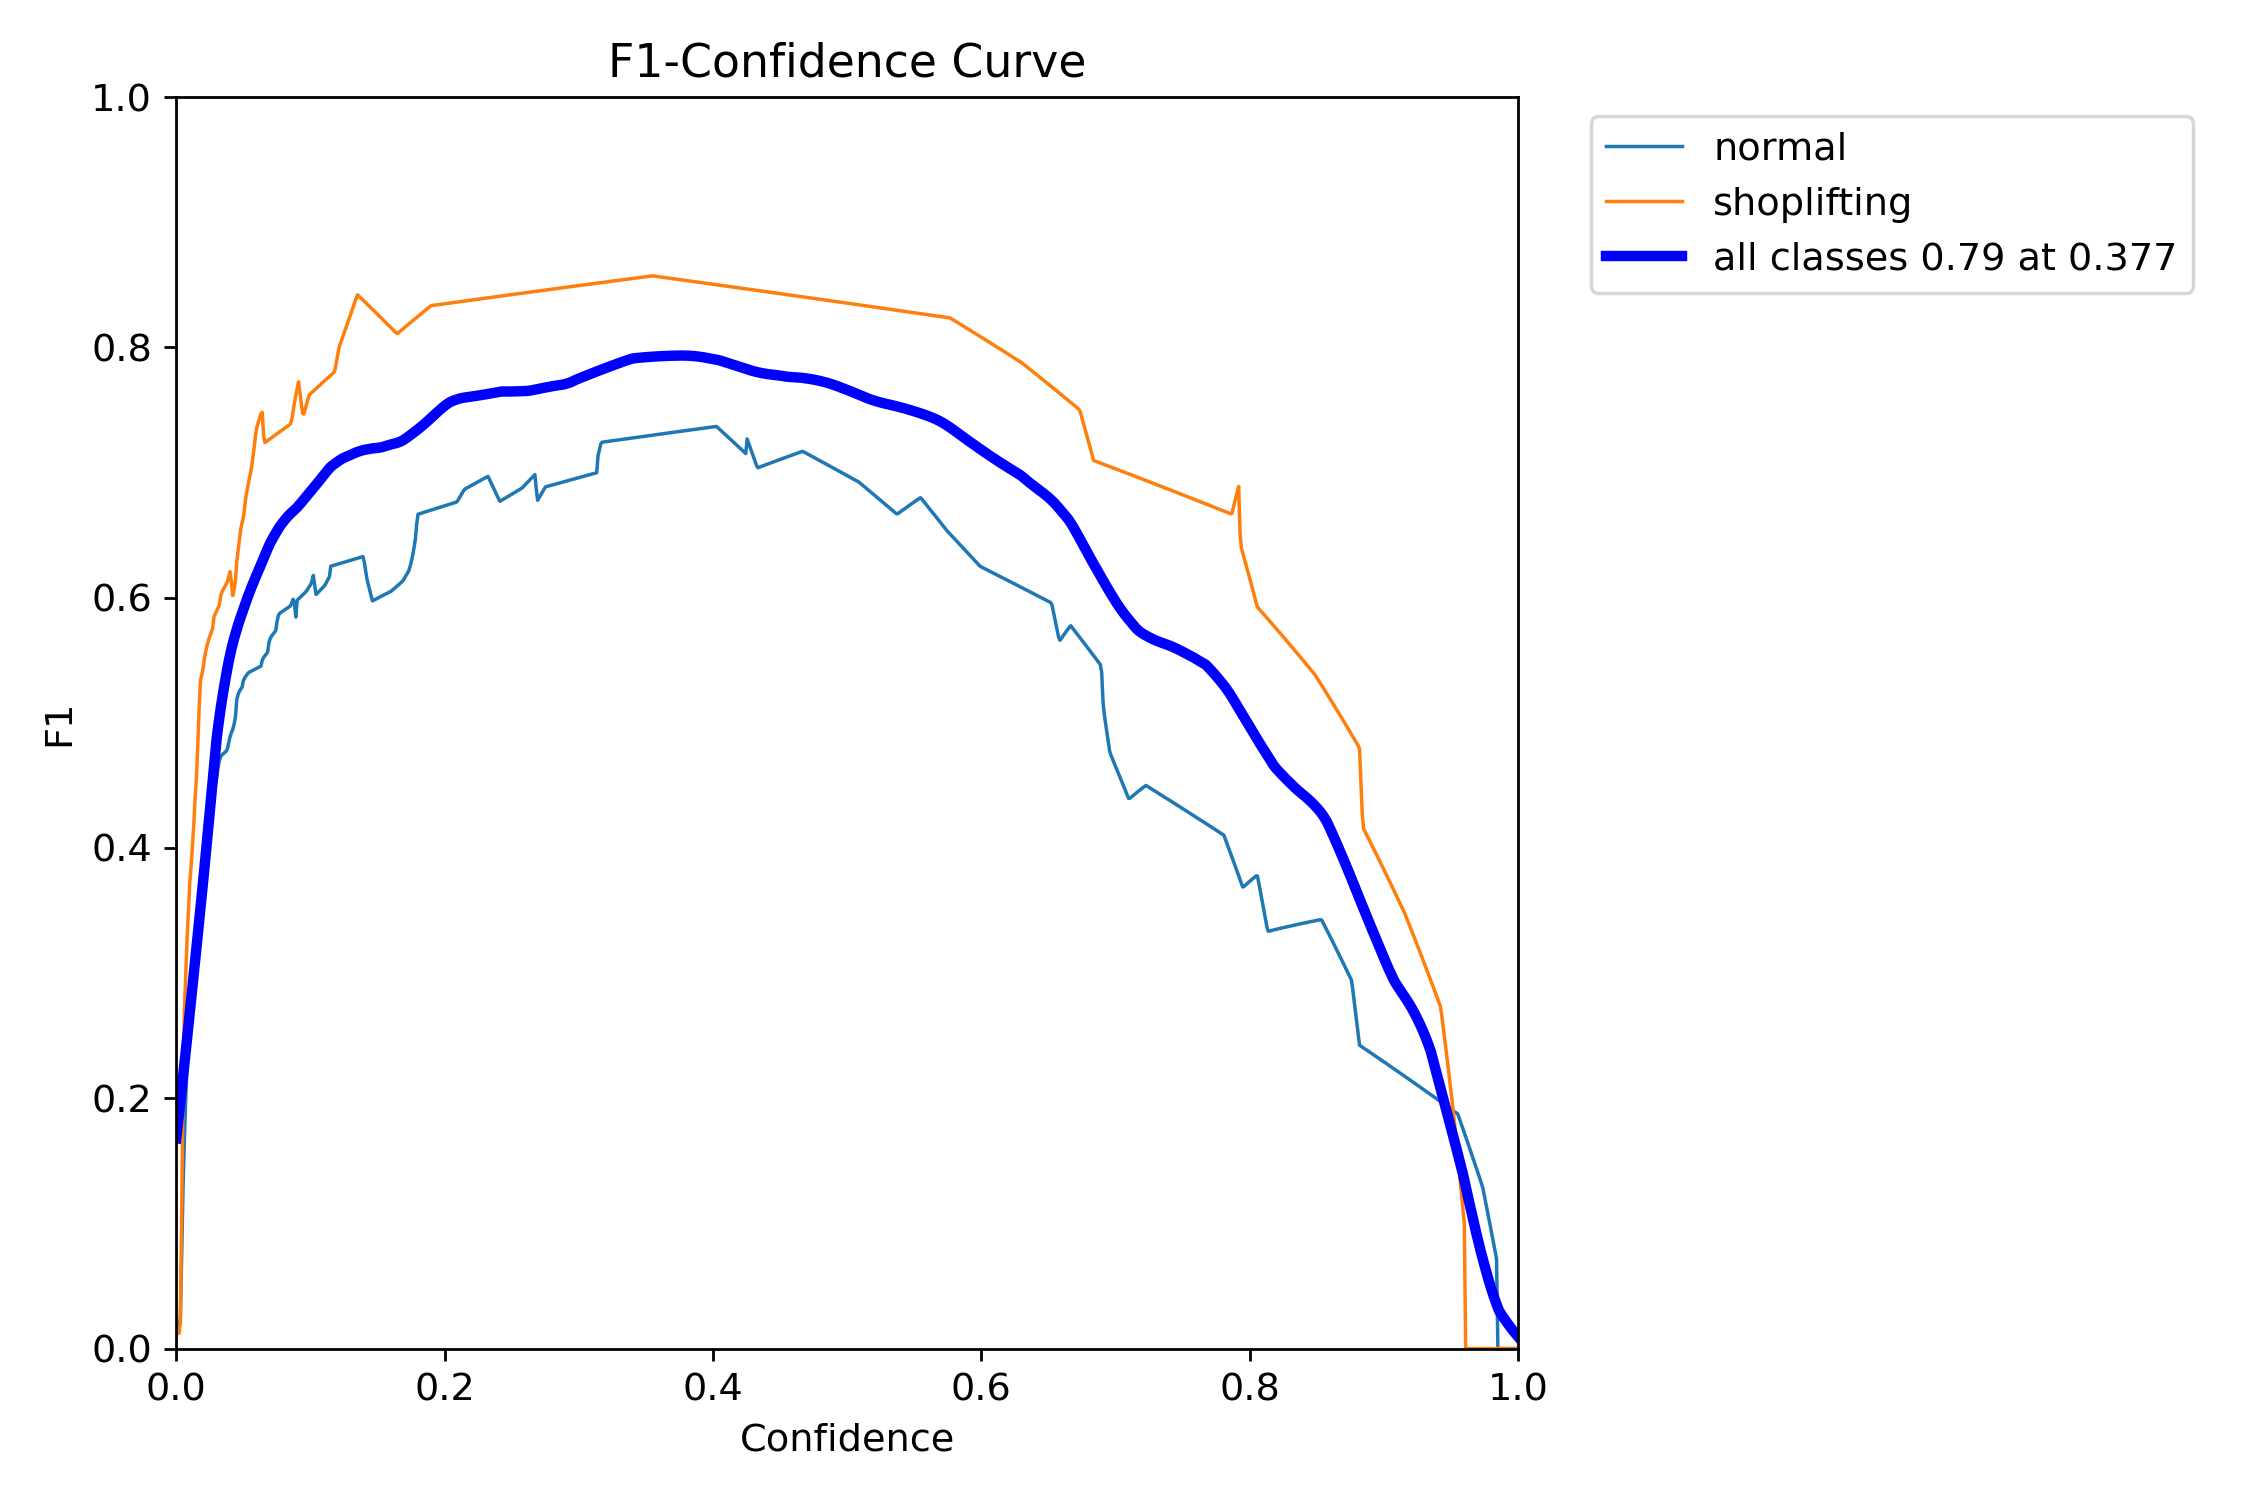

In [19]:
display(Image(filename='/content/runs/detect/train2/F1_curve.png', width=600))

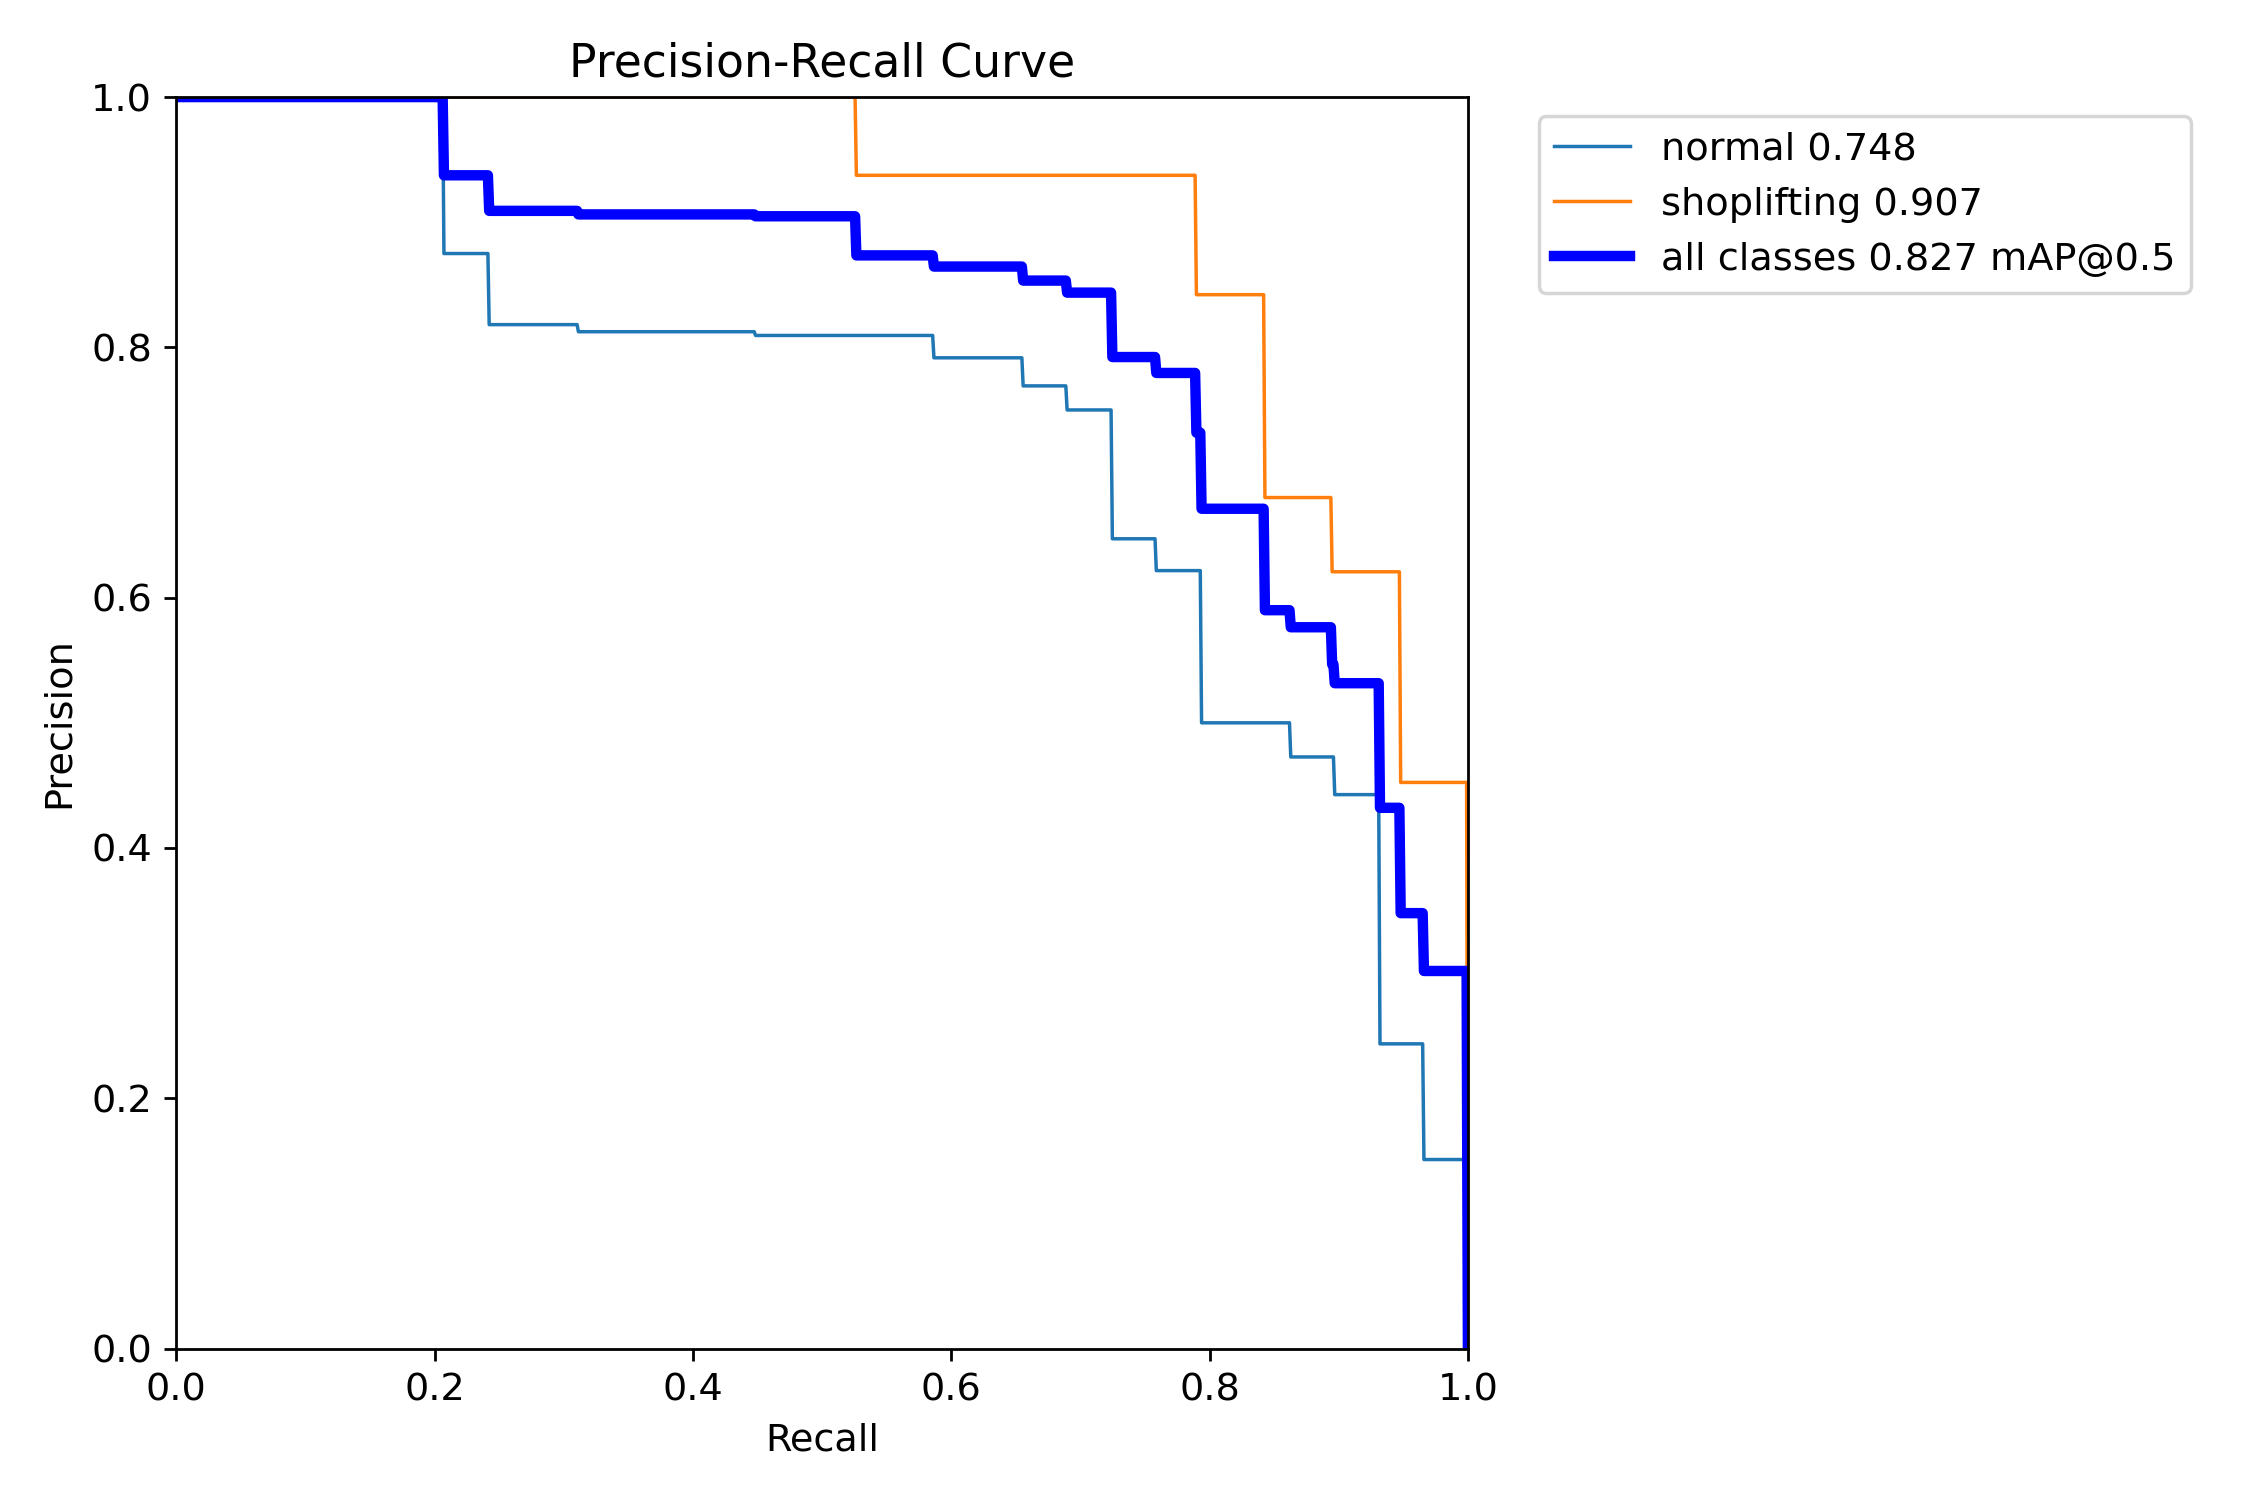

In [20]:
display(Image(filename='/content/runs/detect/train2/PR_curve.png', width=600))

### **Validate fine-tuned model**

In [23]:
!yolo task=detect mode=val model=/content/runs/detect/train3/weights/best.pt data=/content/theft-detection-2/data.yaml


Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/theft-detection-2/valid/labels.cache... 22 images, 0 backgrounds, 0 corrupt: 100% 22/22 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.28it/s]
                   all         22         48      0.826      0.755      0.824      0.584
                normal         15         29      0.714      0.724       0.74      0.453
           shoplifting         17         19      0.937      0.786      0.907      0.715
Speed: 0.3ms preprocess, 17.9ms inference, 0.0ms loss, 36.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [27]:
from ultralytics import YOLO

# Load the trained YOLOv8 model
model_path = '/content/runs/detect/train3/weights/best.pt'
model = YOLO(model_path)

# Run the model on the test images
results = model.predict(source='/content/theft-detection-2/test/images', conf=0.25, save=True)


image 1/21 /content/theft-detection-2/test/images/Shoplifting001_x264_frame_56_jpg.rf.496630f9d92d743b7eeabde968afed1c.jpg: 640x640 2 normals, 17.8ms
image 2/21 /content/theft-detection-2/test/images/Shoplifting001_x264_frame_60_jpg.rf.ec36159f4a1daaccfab296e17e4ab5fc.jpg: 640x640 3 normals, 10.9ms
image 3/21 /content/theft-detection-2/test/images/Shoplifting014_x264_frame_1654_jpg.rf.a31e1114f2bb151a293eb4eaf3483ca9.jpg: 640x640 1 normal, 14.4ms
image 4/21 /content/theft-detection-2/test/images/Shoplifting026_x264_frame_15_jpg.rf.7ab12e897117d2adca8373b3ab524a99.jpg: 640x640 1 normal, 12.9ms
image 5/21 /content/theft-detection-2/test/images/Shoplifting026_x264_frame_21_jpg.rf.abd515a64d8602c8bca777892b18d8ca.jpg: 640x640 1 normal, 15.8ms
image 6/21 /content/theft-detection-2/test/images/Shoplifting026_x264_frame_33_jpg.rf.d9199a06348551d46d333735c235bf3c.jpg: 640x640 1 shoplifting, 17.1ms
image 7/21 /content/theft-detection-2/test/images/Shoplifting029_x264_frame_47_jpg.rf.f1b4071401

# **Inference with custom model**

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/fire-2/test/images save=True

Ultralytics 8.3.2 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

image 1/14 /content/fire-2/test/images/Img_2046_jpg.rf.fd9069452fef961c11674f590ba87964.jpg: 640x640 1 fire, 15.7ms
image 2/14 /content/fire-2/test/images/NoiseWEBSmoke1939_jpg.rf.b2cbdb05d2051ac73d017dfbd4f0d92a.jpg: 640x640 2 fires, 9.2ms
image 3/14 /content/fire-2/test/images/NoiseWEBSmoke2570_jpg.rf.52d65771af43981a1f57e5070d285f8d.jpg: 640x640 1 fire, 8.7ms
image 4/14 /content/fire-2/test/images/WEBFire1412_jpg.rf.c309c37d7ea90dae76d5a3d07f931ee6.jpg: 640x640 3 fires, 8.2ms
image 5/14 /content/fire-2/test/images/WEBFire244_jpg.rf.16f74c6f44ab45caa9f211ecd6b89fa0.jpg: 640x640 2 fires, 7.8ms
image 6/14 /content/fire-2/test/images/WEBSmoke1622_jpg.rf.450894c1e91737155f4e0dee8aac5fe1.jpg: 640x640 2 fires, 8.5ms
image 7/14 /content/fire-2/test/images/WEBSmoke2287_jpg.rf.ecea6385ae5946efb6c93437f27c7662.jpg: 640x640 2 fires,

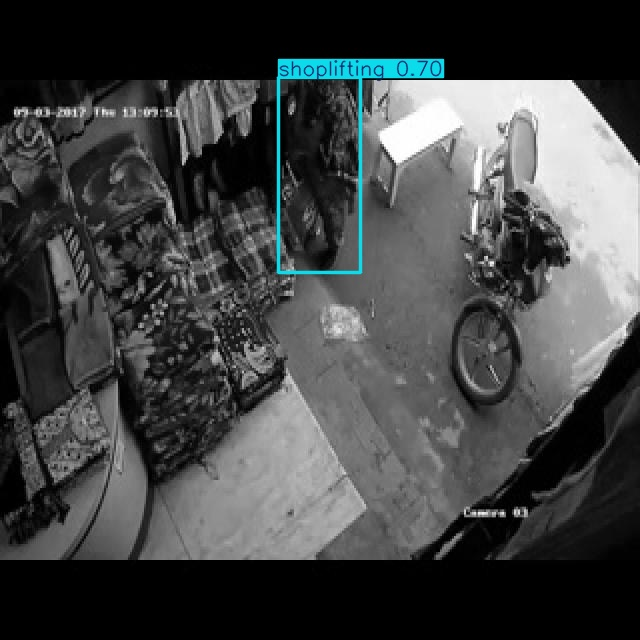

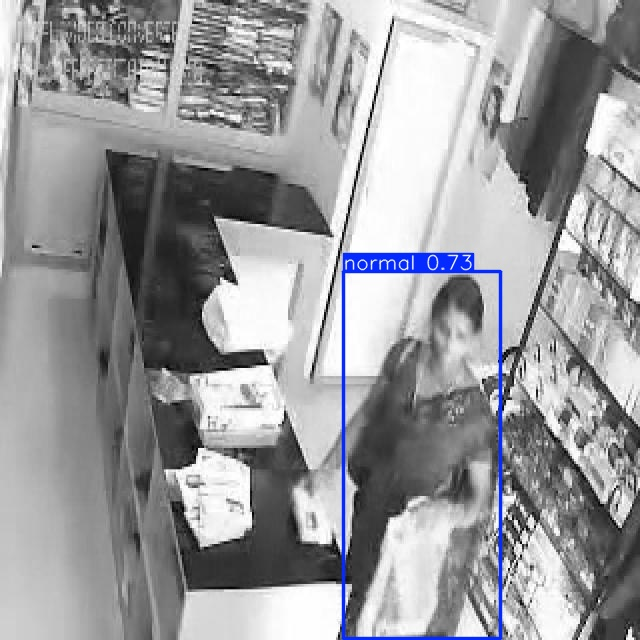

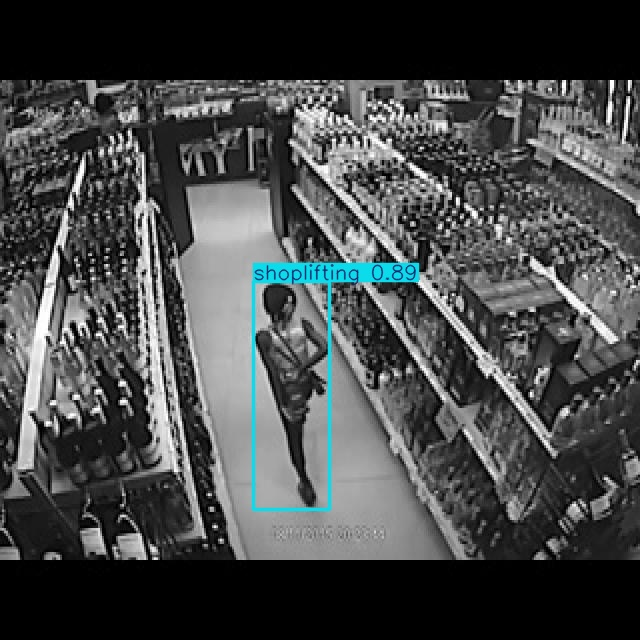

In [30]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
model_path = '/content/runs/detect/train/weights/best.pt'
model = YOLOv10(model_path)
results = model(source='/content/Fire-Detection-1/test/images', conf=0.25,save=True